**Ghailan and Gordon**

Spring 2024

CS 443: Bio-inspired Machine Learning

# Project 0: TensorFlow and MNIST

The goals of this project is to:
- refresh your memory of TensorFlow
- learn how to use new TensorFlow and NumPy functions that will be helpful later in the semester in simple examples
- load and preprocess the MNIST dataset
- build an simple artificial neural network using the TensorFlow low-level API and train it on MNIST.

## AI Policy

To improve the quality of your learning and out of fairness to your hardworking classmates, AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions. This includes both written analysis, plotting, and code. I will only grade your work, not the AI's. I will stop grading your project if I notice AI-generated content (in any capacity).

In [1]:
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/MyDrive/project0

Mounted at /content/drive
/content/drive/MyDrive/project0


In [2]:
%ls

data/  mnist.py  __pycache__/  single_layer_net.py  tf_and_mnist.ipynb  viz.py


In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 18})

np.set_printoptions(suppress=True, precision=3)

%load_ext autoreload
%autoreload 2

## Task 1: TensorFlow

The goal of this task is to refresh your memory of TensorFlow and learn to perform tasks with TensorFlow that will come up later in the semester with simpler examples. Having the TensorFlow documentation open is a good idea:

https://www.tensorflow.org/api_docs/python/tf

In most cases, each subtask requires only 1 line of code to accomplish. And no loops here! :)

### 1a. Convert from NumPy to TensorFlow

Convert the following Tensor to an ndarray.

In [4]:
tensor = tf.constant([[1, 2, 3], [4, 5, 6]])

# YOUR CODE HERE
tensor_np = tensor.numpy()

print(f'Is your array a NumPy ndarray? {isinstance(tensor_np, np.ndarray)}')
print(f'Your array has shape {tensor_np.shape} and it should be (2, 3).')
print(f'Your array has dtype {tensor_np.dtype} and it should be int32.')

Is your array a NumPy ndarray? True
Your array has shape (2, 3) and it should be (2, 3).
Your array has dtype int32 and it should be int32.


### 1b. Convert from TensorFlow to NumPy

Convert the following ndarray to a TensorFlow Tensor with datatype `tf.int64`.

In [5]:
array = np.array([[1, 2, 3], [4, 5, 6]])

# YOUR CODE HERE
array_tf = tf.convert_to_tensor(array, tf.int64)

print(f'Is your array a TF Tensor? {isinstance(array_tf, tf.Tensor)}')
print(f'Your array has shape {array_tf.shape} and it should be (2, 3).')
print(f"Your array has {array_tf.dtype} and it should be <dtype: 'int64'>.")

Is your array a TF Tensor? True
Your array has shape (2, 3) and it should be (2, 3).
Your array has <dtype: 'int64'> and it should be <dtype: 'int64'>.


### 1c. Convert data types

Convert the following Tensor to a `tf.float32` datatype.

In [6]:
tensor = tf.constant([[1, 2, 3], [4, 5, 6]])

# YOUR CODE HERE
tensor_np = tf.cast(tensor,tf.float32)

print(f"Your tensor has {tensor_np.dtype} and it should be <dtype: 'float32'>.")

Your tensor has <dtype: 'float32'> and it should be <dtype: 'float32'>.


### 1d. One-hot coding

- One-hot code the following int-coded class labels. Assume `C=5`.
- Make the dtype `tf.float32`.
- Here's a twist: make the "off value" `-1` instead of `0`.

In [7]:
labels = [2, 3, 0, 1, 1]
labels = np.array(labels)

# YOUR CODE HERE

hot = np.ones((labels.shape[0], 5))*-1
hot[np.arange(labels.shape[0]), labels] = 1


yh = tf.convert_to_tensor(hot, tf.float32)


print(f"Your tensor has {yh.dtype} and it should be <dtype: 'float32'>.")
print(f"Your tensor is\n{yh}")
print('and it should be')
print('''[[-1. -1.  1. -1. -1.]
 [-1. -1. -1.  1. -1.]
 [ 1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1.]
 [-1.  1. -1. -1. -1.]]''')

Your tensor has <dtype: 'float32'> and it should be <dtype: 'float32'>.
Your tensor is
[[-1. -1.  1. -1. -1.]
 [-1. -1. -1.  1. -1.]
 [ 1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1.]
 [-1.  1. -1. -1. -1.]]
and it should be
[[-1. -1.  1. -1. -1.]
 [-1. -1. -1.  1. -1.]
 [ 1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1.]
 [-1.  1. -1. -1. -1.]]


### 1e. (i) Find the index of the top-k items in each row of a Tensor

*This is a multi-part task.*

In this scenario, we want to find the index of the 2nd largest item in each row. While in this case we are interested in the `k=2` largest, your solution should in theory work for any `k`. This is like `argmax` within each row, but more configurable. We may want the index of the max (`k=1`), the 2nd largest (`k=2`), 3rd largest (`k=3`), and so forth. If there are ties for `k`-th place, the smallest column index is fine.

Ultimately, we want the column indices to have a `tf.int32` data type.

**Hint:** There is a hint in the title of this subtask...

In [8]:
tf.random.set_seed(0)
my_tensor = tf.cast(tf.random.uniform(maxval=10, shape=(7, 4), dtype=tf.int64), dtype=tf.float32)

k=2
values, indices = tf.approx_top_k(my_tensor, k)

col_indices = indices[:,k-1]

print(f'my_tensor is:\n{my_tensor}')
print(f'Column indices shape is {col_indices.shape} and should be (7,).')
print(f'Column indices of the 2nd largest values in each row are:\n{col_indices}')
print('They should be\n[3 0 3 2 3 1 2]')
print(f"Dtype is {col_indices.dtype} as it should be <dtype: 'int32'>")



my_tensor is:
[[7. 3. 1. 4.]
 [2. 2. 2. 3.]
 [7. 3. 4. 7.]
 [1. 6. 4. 0.]
 [1. 7. 2. 3.]
 [1. 8. 9. 2.]
 [9. 2. 7. 4.]]
Column indices shape is (7,) and should be (7,).
Column indices of the 2nd largest values in each row are:
[3 0 3 2 3 1 2]
They should be
[3 0 3 2 3 1 2]
Dtype is <dtype: 'int32'> as it should be <dtype: 'int32'>


### 1e. (ii) Generating sequences of values

Generate a 1D Tensor of `tf.int32` values that go from 0 to the number of rows in `my_tensor` - 1, in steps of 1.

In [9]:
# YOUR CODE HERE
array = np.arange(0, my_tensor.shape[0], 1)
row_indices = tf.convert_to_tensor(array, tf.int32)
print(f'Row indices shape is {row_indices.shape} and should be (7,).')
print(f'Your row indices are:\n{row_indices}')
print('They should be\n[0 1 2 3 4 5 6]')
print(f"Dtype is {row_indices.dtype} as it should be <dtype: 'int32'>")

Row indices shape is (7,) and should be (7,).
Your row indices are:
[0 1 2 3 4 5 6]
They should be
[0 1 2 3 4 5 6]
Dtype is <dtype: 'int32'> as it should be <dtype: 'int32'>


### 1e. (iii) Stacking multiple Tensors together

Now you have a list of row indices (`row_indices`) and a list of column indices (`col_indices`). Write code to stack them into a single Tensor where the first column holds the row indices and the second column holds the column indices. In other words, we are creating row-col index pairs in each row.

Example:
`rows: [0, 1, 2]`
`cols: [9, 8, 7]`

We want combined:
```
0, 9
1, 8
2, 7
```

In [10]:
# YOUR CODE HERE  !!!!!seems to have an error on the notebooks end
rc_indices = tf.stack([row_indices, col_indices], 1)


print(f'Rows are: {row_indices}')
print(f'Cols are: {col_indices}')
print(f'Your combined Tensor is:\n{rc_indices} and it should be:')
print('''[[0 3]
 [1 1]
 [2 0]
 [3 2]
 [4 3]
 [5 1]
 [6 2]]''')


Rows are: [0 1 2 3 4 5 6]
Cols are: [3 0 3 2 3 1 2]
Your combined Tensor is:
[[0 3]
 [1 0]
 [2 3]
 [3 2]
 [4 3]
 [5 1]
 [6 2]] and it should be:
[[0 3]
 [1 1]
 [2 0]
 [3 2]
 [4 3]
 [5 1]
 [6 2]]


### 1e. (iv) Creating a mask in TensorFlow

Let's say we want to create a Tensor of all 0s, except have some constant value at the locations of the 2nd largest items you found above in `my_tensor`. This Tensor should have the same shape as `my_tensor`. Let's make that constant value `99` here. Figure out how to use the TensorFlow function [scatter_nd](https://www.tensorflow.org/api_docs/python/tf/scatter_nd) to accomplish this.

*Creating a Tensor that is the same shape as the original Tensor with all 0s except at preset locations is called a **mask**.*

In [11]:
# YOUR CODE HERE
print(my_tensor.shape)
mask_tensor = tf.scatter_nd(rc_indices, tf.ones(my_tensor.shape[0])*99, my_tensor.shape)

print(f'updated tensor is:\n{mask_tensor} and should be:')
print('''[[ 0.  0.  0. 99.]
 [99.  0.  0.  0.]
 [ 0.  0.  0. 99.]
 [ 0.  0. 99.  0.]
 [ 0.  0.  0. 99.]
 [ 0. 99.  0.  0.]
 [ 0.  0. 99.  0.]]''')
print(f'Column indices of the 2nd largest values in each row are:\n{tf.squeeze(col_indices)}')
print('They should be\n[3 0 3 2 3 1 2]')
print(f"Dtype is {col_indices.dtype} as it should be <dtype: 'int32'>")



(7, 4)
updated tensor is:
[[ 0.  0.  0. 99.]
 [99.  0.  0.  0.]
 [ 0.  0.  0. 99.]
 [ 0.  0. 99.  0.]
 [ 0.  0.  0. 99.]
 [ 0. 99.  0.  0.]
 [ 0.  0. 99.  0.]] and should be:
[[ 0.  0.  0. 99.]
 [99.  0.  0.  0.]
 [ 0.  0.  0. 99.]
 [ 0.  0. 99.  0.]
 [ 0.  0.  0. 99.]
 [ 0. 99.  0.  0.]
 [ 0.  0. 99.  0.]]
Column indices of the 2nd largest values in each row are:
[3 0 3 2 3 1 2]
They should be
[3 0 3 2 3 1 2]
Dtype is <dtype: 'int32'> as it should be <dtype: 'int32'>


### 1e. (v) Updating a Tensor

Recall that we cannot use assignment to update values in Tensors, but it is actually still possible to update them. Update the 2nd largest values in each row of `my_tensor`, replacing them with `99`. *This is just like the previous subtask, except the Tensor has the original values instead of `0`s in the non-`99` entries.*

**Hint:** There is a helpful function that is very similar in name to `scatter_nd`. The name is very long...

In [12]:
# YOUR CODE HERE
updated_tensor = tf.tensor_scatter_nd_update(my_tensor, rc_indices, tf.ones(my_tensor.shape[0])*99)


print(f'The updated my_tensor is:\n{updated_tensor} and it should be')
print('''[[ 7.  3.  1. 99.]
 [99.  2.  2.  3.]
 [ 7.  3.  4. 99.]
 [ 1.  6. 99.  0.]
 [ 1.  7.  2. 99.]
 [ 1. 99.  9.  2.]
 [ 9.  2. 99.  4.]]''')

The updated my_tensor is:
[[ 7.  3.  1. 99.]
 [99.  2.  2.  3.]
 [ 7.  3.  4. 99.]
 [ 1.  6. 99.  0.]
 [ 1.  7.  2. 99.]
 [ 1. 99.  9.  2.]
 [ 9.  2. 99.  4.]] and it should be
[[ 7.  3.  1. 99.]
 [99.  2.  2.  3.]
 [ 7.  3.  4. 99.]
 [ 1.  6. 99.  0.]
 [ 1.  7.  2. 99.]
 [ 1. 99.  9.  2.]
 [ 9.  2. 99.  4.]]


### 1f. Generating random numbers

Generate 7 uniformly random floats between -1 (inclusive) and +1 (exclusive).

In [13]:
tf.random.set_seed(0)  # KEEP ME

# YOUR CODE HERE
rand_nums = tf.random.uniform((1,7), -1, 1)

print(f'Your random numbers are:\n{rand_nums}\nand should be\n[-0.416 -0.587  0.071  0.123 -0.167  0.616 -0.014]')

Your random numbers are:
[[-0.416 -0.587  0.071  0.123 -0.167  0.616 -0.014]]
and should be
[-0.416 -0.587  0.071  0.123 -0.167  0.616 -0.014]


### 1g. Exchanging rows and columns

Exchange the rows and columns of the Tensor `a` below.

In [14]:
a = tf.constant([[1, 2, 3], [4, 5, 6]])

# YOUR CODE HERE
a1 = tf.transpose(a)

print(f'Your tensor:\n{a1} and it should be:')
print('''[[1 4]
 [2 5]
 [3 6]]''')

Your tensor:
[[1 4]
 [2 5]
 [3 6]] and it should be:
[[1 4]
 [2 5]
 [3 6]]


### 1h. Indexing a tensor with non-contiguous indices

Let's say we have the Tensor below:

```
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
```

and we wanted to index into it so that we extract the 1st row, the last row, the 2nd row, the 2nd to last row, ... (in that order):

```
[[ 0,  1,  2,  3],
 [20, 21, 22, 23],
 [ 4,  5,  6,  7],
 [16, 17, 18, 19],
 [ 8,  9, 10, 11],
 [12, 13, 14, 15]]
```

In one line of code, use a function to accomplish this indexing operation (i.e. no square bracket syntax).

**Hint:** This function was included in the TensorFlow tutorial from last semester, but we didn't actually use it for anything at the time...

In [15]:
tensor = tf.reshape(tf.range(24), [6, 4])
indices = [0, 5, 1, 4, 2, 3]  # List of inds of rows to extract from tensor (in that order).

# YOUR CODE HERE

tensor_reordered = tf.gather(tensor, indices)
print(f'Your tensor is:\n{tensor}')
print(f'Your reordered tensor is:\n{tensor_reordered} and should be')
print('''[[ 0  1  2  3]
 [20 21 22 23]
 [ 4  5  6  7]
 [16 17 18 19]
 [ 8  9 10 11]
 [12 13 14 15]]''')



Your tensor is:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
Your reordered tensor is:
[[ 0  1  2  3]
 [20 21 22 23]
 [ 4  5  6  7]
 [16 17 18 19]
 [ 8  9 10 11]
 [12 13 14 15]] and should be
[[ 0  1  2  3]
 [20 21 22 23]
 [ 4  5  6  7]
 [16 17 18 19]
 [ 8  9 10 11]
 [12 13 14 15]]


### 1i. Summing along an axis while preserving the number of dimensions

The below operation `op` subtracts the sum of values within each row and normalizes so that the max within each column is 1. Your task is to define `row_sum`, which is the sum of all entries within each row. `row_sum` needs to retain a 2D shape for `op` not to crash (something like `(3, 1)`, not something that looks like `(3,)`).

In [16]:
new_tensor = tf.constant([[1, 3, 5, 6], [7, 8, 9, 9], [3, 2, 1, 0]], dtype=tf.float32)

# YOUR CODE HERE

row_sum = tf.reduce_sum(new_tensor, axis = 1, keepdims=True)


op = (new_tensor - row_sum) / (tf.constant([-26, -25, -24, -24], dtype=tf.float32))
print(f'The result of the operation is tensor is:\n{op} and it should be')
print('''[[0.538 0.48  0.417 0.375]
 [1.    1.    1.    1.   ]
 [0.115 0.16  0.208 0.25 ]]''')



The result of the operation is tensor is:
[[0.538 0.48  0.417 0.375]
 [1.    1.    1.    1.   ]
 [0.115 0.16  0.208 0.25 ]] and it should be
[[0.538 0.48  0.417 0.375]
 [1.    1.    1.    1.   ]
 [0.115 0.16  0.208 0.25 ]]


### 1j. Checking the device on which TensorFlow is executing your code

Below, print out:

1. the list of physical devices Tensorflow has access to on your computer that are of type `'CPU'`. For most of you, there should be one physical device entry that mentions "CPU".
2. the list of physical devices Tensorflow has access to on your computer that are of type `'GPU'`. For most of you, this could be an empty list.

An example printout is:

```
CPU devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU devices:
[]
```

In [17]:
print('CPU devices:')
print(tf.config.list_physical_devices('CPU'))
print('GPU devices:')
print(tf.config.list_physical_devices('GPU'))


CPU devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU devices:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### 1k. Throwback to NumPy: logical indexing

This subtask involves NumPy, not TensorFlow.

In one line of code, use logical indexing to replace all positive values in the below 2D ndarray with 1s.

In [18]:
np.random.seed(0)
arr = np.random.uniform(-0.5, 0.5, size=(2, 10))

# YOUR CODE HERE
arr = np.where(arr>0,1,arr)

print(f'After the replacement, your array looks like:\n{arr}')
print('and it should look like')
print('''[[ 1.     1.     1.     1.    -0.076  1.    -0.062  1.     1.    -0.117]
 [ 1.     1.     1.     1.    -0.429 -0.413 -0.48   1.     1.     1.   ]]''')

After the replacement, your array looks like:
[[ 1.     1.     1.     1.    -0.076  1.    -0.062  1.     1.    -0.117]
 [ 1.     1.     1.     1.    -0.429 -0.413 -0.48   1.     1.     1.   ]]
and it should look like
[[ 1.     1.     1.     1.    -0.076  1.    -0.062  1.     1.    -0.117]
 [ 1.     1.     1.     1.    -0.429 -0.413 -0.48   1.     1.     1.   ]]


## Task 2: MNIST Dataset

This task focuses on accessing and preprocessing MNIST, a popular image dataset that we will use throughout the semester. MNIST has 60,000 training samples and 10,000 test samples. Each sample is a `28x28` image of a hand written digit. The digit in each sample image is the class label. The digit may be any in the range `0-9` ($C = 10$).

In [19]:
from mnist import get_mnist

### 2a. Load and preprocess MNIST

Implement and test `get_mnist(N_val, path)` and other helper functions in `mnist.py` to load in MNIST, preprocess the dataset, then create train/validation/test splits.

In [20]:
x_train, y_train, x_test, y_test, x_val, y_val = get_mnist(1000)

print('Preprocessed shapes:')
print(f'{x_train.shape=} {x_test.shape=} {x_val.shape=}\n{y_train.shape=} {y_test.shape=} {y_val.shape=}')
print('--------------')
print(f'Train min/max: {tf.reduce_min(x_train)}/{tf.reduce_max(x_train)}')
print(f'Validation min/max: {tf.reduce_min(x_val)}/{tf.reduce_max(x_val)}')
print(f'Test min/max: {tf.reduce_min(x_test)}/{tf.reduce_max(x_test)}')
print(f'Training samples {x_train.dtype=}, Validation samples {x_val.dtype=}, Test samples {x_test.dtype=}')
print(f'Training labels {y_train.dtype=}, Validation labels {y_val.dtype=}, Test labels {y_test.dtype=}')
print(f'Labels present in training set: {tf.sort(tf.unique(y_train)[0])}')
print(f'Labels present in validation set: {tf.sort(tf.unique(y_val)[0])}')
print(f'Labels present  in test set: {tf.sort(tf.unique(y_test)[0])}')
print(f'First 5 training labels: {y_train[:5]}')
print(f'First 5 validation labels: {y_val[:5]}')
print(f'First 5 test labels: {y_test[:5]}')

Preprocessed shapes:
x_train.shape=TensorShape([59000, 784]) x_test.shape=TensorShape([10000, 784]) x_val.shape=TensorShape([1000, 784])
y_train.shape=TensorShape([59000]) y_test.shape=TensorShape([10000]) y_val.shape=TensorShape([1000])
--------------
Train min/max: 0.0/1.0
Validation min/max: 0.0/1.0
Test min/max: 0.0/1.0
Training samples x_train.dtype=tf.float32, Validation samples x_val.dtype=tf.float32, Test samples x_test.dtype=tf.float32
Training labels y_train.dtype=tf.int64, Validation labels y_val.dtype=tf.int64, Test labels y_test.dtype=tf.int64
Labels present in training set: [0 1 2 3 4 5 6 7 8 9]
Labels present in validation set: [0 1 2 3 4 5 6 7 8 9]
Labels present  in test set: [0 1 2 3 4 5 6 7 8 9]
First 5 training labels: [9 3 3 0 0]
First 5 validation labels: [9 3 7 3 4]
First 5 test labels: [9 1 0 9 2]


You should see:

    Preprocessed shapes:
    x_train.shape=TensorShape([59000, 784]) x_test.shape=TensorShape([10000, 784]) x_val.shape=TensorShape([1000, 784])
    y_train.shape=(59000,) y_test.shape=(10000,) y_val.shape=(1000,)
    --------------
    Train min/max: 0.0/1.0
    Validation min/max: 0.0/1.0
    Test min/max: 0.0/1.0
    Training samples x_train.dtype=tf.float32, Validation samples x_val.dtype=tf.float32, Test samples x_test.dtype=tf.float32
    Training labels y_train.dtype=dtype('int64'), Validation labels y_val.dtype=dtype('int64'), Test labels y_test.dtype=dtype('int64')
    Labels present in training set: [0 1 2 3 4 5 6 7 8 9]
    Labels present in validation set: [0 1 2 3 4 5 6 7 8 9]
    Labels present  in test set: [0 1 2 3 4 5 6 7 8 9]
    First 5 training labels: [9 3 3 0 0]
    First 5 validation labels: [9 3 7 3 4]
    First 5 test labels: [9 1 0 9 2]

### 2b. Visualize MNIST samples

Use `draw_grid_image()` in `viz.py` in the cell below to create a `10x10` grid of the first 100 MNIST validation sample images. Be sure to convert the 1st 100 samples from Tensor to NumPy ndarray format before passing them into `draw_grid_image`.

This function places the image samples on a *single canvas* image (i.e. does not create subplots). Plotting one image instead an 2D array is more efficient (*you will be using this to visualize weights many times during training)*!

If you selected the first `N_val` samples for your validation set, the first two rows of your image should consist of the following digits:

```
[[9 3 7 3 4 5 9 1 2 4]
 [9 7 8 8 4 1 2 8 4 2]]
```

In [21]:
from viz import draw_grid_image

(1000, 784)
(1000, 28, 28, 1)


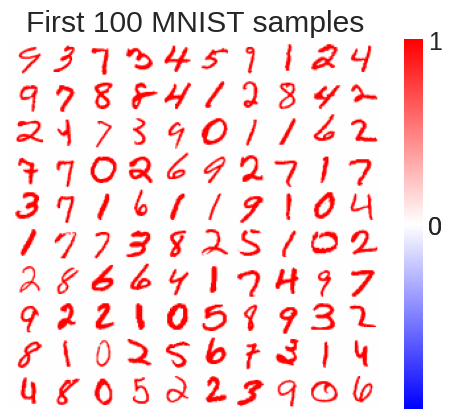

In [22]:
val_numpy = x_val.numpy()
print(val_numpy.shape)
val_numpy = np.reshape(val_numpy,(1000,28,28,1))
print(val_numpy.shape)


draw_grid_image(val_numpy, 10,10,(28,28,1), title = "First 100 MNIST samples")

## Task 3: Implement and train a single layer classification neural network

To help refresh your memory on TensorFlow and artificial neural networks, you will implement a single layer softmax neural network in 100% TensorFlow low-level API (no NumPy). There is nothing different about this network than what you built last semester in the MLP project. This warm-up task will allow you to practice design skills that you have developed in CS 343 and apply them to a new situation. It is important that your code is 100% TensorFlow because you will train the network in Task 4 using a graphics processing unit (GPU) on the MNIST dataset that you prepared from Task 2. **You will be re-using this code in Project 1 so write efficient and clean code.**

I encourage you to consult code and in-class tutorials from last semester to help jog your memory.

In [23]:
from single_layer_net import SingleLayerNetwork

### 3a. Implement `SingleLayerNetwork` class: basics

In `single_layer_net`, `SingleLayerNetwork` is a parent class and implements general features that any single layer network should have. *There will be specific single layer neural networks below and in Project 1 that inherit from `SingleLayerNetwork`.*

Start by implementing methods in the parent class that all the neural networks will share. Use the below test code to help you along.

- Constructor
- `get_wts(self)`
- `get_b(self)`
- `set_wts(self)`
- `set_b(self)`
- `one_hot(self, y, C, off_value=0)`
- `accuracy(self, y_true, y_pred)`

**Reminder:** All code in `single_layer_net.py` should be built using TensorFlow only (no Numpy). So there is no need to import numpy.

#### Test: weight and bias initialization

In [24]:
tf.random.set_seed(0)
M, C = 3, 2
nl = SingleLayerNetwork(M, C, wt_stdev=0.01)
wts = nl.get_wts()
b = nl.get_b()
print(f"Your wts are:\n{wts}\nand should be:")
print("""<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.015,  0.004],
       [-0.004, -0.01 ],
       [-0.012,  0.005]], dtype=float32)>""")
print(f"\nYour bias is:\n{b}\nand should be")
print("""<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0.011, 0.002], dtype=float32)> """)

Your wts are:
<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.015,  0.004],
       [-0.004, -0.01 ],
       [-0.012,  0.005]], dtype=float32)>
and should be:
<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.015,  0.004],
       [-0.004, -0.01 ],
       [-0.012,  0.005]], dtype=float32)>

Your bias is:
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.011],
       [0.002]], dtype=float32)>
and should be
<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0.011, 0.002], dtype=float32)> 


#### Test: one-hot

In [25]:
C = 5
y = tf.constant([0, 3, 2, 4])
nl = SingleLayerNetwork(1, C)
print(f'Your one-hot coding of {y} is:')
tf.print(nl.one_hot(y, C))
print('and should be:\n[[1 0 0 0 0]\n [0 0 0 1 0]\n [0 0 1 0 0]\n [0 0 0 0 1]]')

Your one-hot coding of [0 3 2 4] is:
[[1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]
and should be:
[[1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]


#### Test: accuracy

In [26]:
nl = SingleLayerNetwork(1, 1)
y1 = tf.constant([1, 2, 3, 1, 2, 3])
y2 = tf.constant([1, 0, 3, 1, 0, 3])
acc = nl.accuracy(y1, y2)
print(f'Your accuracy is {acc:.2f} and should be 0.67')

Your accuracy is 0.67 and should be 0.67


### 3b. Implement `SoftmaxNet` class

Create a class in `single_layer_net.py` called `SoftmaxNet` that inherits from `SingleLayerNetwork`. Implement and test the following methods in your `SoftmaxNet` class:
- `forward(self, x):` Do the forward pass with samples `x`. For the softmax network, this is Dense netIn followed by softmax netAct.
- `loss(self, yh, net_act):` Computes cross-entropy loss with true classes `yh` (one-hot coded) and `net_act`.


For cross-entropy loss, you can use the "one-hot version" of the equation (*since true class values $\vec{yh}$ are one-hot coded coming in*):

$$L = -\frac{1}{B} \sum_{i=1}^B \sum_{c=1}^C yh_{ic} \times log(\text{netAct}_{ic})$$

where $B$ is the mini-batch size and $C$ is the number of classes, like usual.

#### Tips
- If you are getting type compatibility problems, try casting to `tf.float32`.

In [27]:
from single_layer_net import SoftmaxNet

#### Test forward

In [28]:
N, M, C = 4, 3, 5

# test input samples
tf.random.set_seed(0)
x = tf.random.normal(shape=(N, M), dtype=tf.float32)

sm_net = SoftmaxNet(M, C)
sm_net.set_b(tf.constant([-0.062,  0.088, -0.148, 0.3, -0.002], dtype=tf.float32))
sm_net.set_wts(tf.constant([[-0.062,  0.112,  0.127, 0.11, 0.12], \
    [ 0.143,  0.04 ,  0.063, -0.11, -0.12], \
    [-0.22 ,  0.189, -0.017, 0.13, 0.14]], dtype=tf.float32))
test_net_act = sm_net.forward(x)

print(f'Your net_act is:\n{test_net_act}')
print('and it should be:')
print("""[[0.172 0.209 0.186 0.248 0.185]
 [0.151 0.201 0.138 0.292 0.217]
 [0.181 0.237 0.17  0.237 0.174]
 [0.166 0.193 0.166 0.272 0.203]]""")

Your net_act is:
[[0.172 0.209 0.186 0.248 0.185]
 [0.151 0.201 0.138 0.292 0.217]
 [0.181 0.237 0.17  0.237 0.174]
 [0.166 0.193 0.166 0.272 0.203]]
and it should be:
[[0.172 0.209 0.186 0.248 0.185]
 [0.151 0.201 0.138 0.292 0.217]
 [0.181 0.237 0.17  0.237 0.174]
 [0.166 0.193 0.166 0.272 0.203]]


#### Test loss

In [29]:
N, M, C = 4, 3, 5

# test input samples
tf.random.set_seed(0)
x = tf.random.normal(shape=(N, M), dtype=tf.float32)

sm_net = SoftmaxNet(M, C)
sm_net.set_b(tf.constant([-0.062,  0.088, -0.148, 0.3, -0.002], dtype=tf.float32))
sm_net.set_wts(tf.constant([[-0.062,  0.112,  0.127, 0.11, 0.12], \
    [ 0.143,  0.04 ,  0.063, -0.11, -0.12], \
    [-0.22 ,  0.189, -0.017, 0.13, 0.14]], dtype=tf.float32))
test_net_act = sm_net.forward(x)
test_yh = sm_net.one_hot(y, C)
test_loss = sm_net.loss(test_yh, test_net_act)

print(f'Your loss is {test_loss:.4f} and it should be 1.5895')

Your loss is 1.5895 and it should be 1.5895


### 3c. Single layer network shared functionality (`predict`)

Now that you've implemented the specific methods for the softmax net, implement the `predict(self, x, net_act=None)` in the `SingleLayerNetwork` class, which predicts the class of each sample in `x`.

To predict the class of sample `i` $c_i^*$, you can use the softmax activations in the output layer:
$$c_i^* = argmax_{c}(\text{netAct}_{ic})$$


#### Test `predict`

In [30]:
N, M, C = 4, 3, 3

# test input samples
tf.random.set_seed(5)
x = tf.random.normal(shape=(N, M), dtype=tf.float32)

sm_net = SoftmaxNet(M, C)
sm_net.set_b(tf.constant([-0.062,  0.088, -0.148], dtype=tf.float32))
sm_net.set_wts(tf.constant([[-0.062,  0.112,  0.127], \
    [ 0.143,  0.04 ,  0.063], \
    [-0.22 ,  0.189, -0.017]], dtype=tf.float32))
test_preds = sm_net.predict(x)

tf.print(f'Your test predicted classes are {test_preds} and they should be [1 0 1 1]')

Your test predicted classes are [1 0 1 1] and they should be [1 0 1 1]


### 3d. Single layer network shared functionality (`extract_at_indices` and `fit`)

Next implement:
- `extract_at_indices(self, x, indices)`: small helper method that that returns the samples or labels (`x`) at the indices `indices`. Useful for forming mini-batches during training.
- `fit`

#### Test `extract_at_indices`

In [31]:
sd = SoftmaxNet(1, 1)

# Test 1
test_samples = tf.reshape(tf.range(100, dtype=tf.float32), [25, 4])
test_1_inds = tf.constant([0, 10, 2])
test_1_vals = sd.extract_at_indices(test_samples, test_1_inds)
print(f'Test 1:\n-------\n {test_1_vals=}\n and should be')
print(""" test_1_vals=<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [40., 41., 42., 43.],
       [ 8.,  9., 10., 11.]], dtype=float32)>""")

# Test 2
tf.random.set_seed(0)
test_labels = tf.random.shuffle(tf.range(10))
test_2_inds = tf.constant([1, 2, 3, 4])
test_2_vals = sd.extract_at_indices(test_labels, test_2_inds)
print(f'Test 2:\n-------\n {test_2_vals=}\n and should be')
print(""" test_2_vals=<tf.Tensor: shape=(4,), dtype=int32, numpy=array([9, 1, 2, 7], dtype=int32)>""")


Test 1:
-------
 test_1_vals=<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [40., 41., 42., 43.],
       [ 8.,  9., 10., 11.]], dtype=float32)>
 and should be
 test_1_vals=<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [40., 41., 42., 43.],
       [ 8.,  9., 10., 11.]], dtype=float32)>
Test 2:
-------
 test_2_vals=<tf.Tensor: shape=(4,), dtype=int32, numpy=array([9, 1, 2, 7], dtype=int32)>
 and should be
 test_2_vals=<tf.Tensor: shape=(4,), dtype=int32, numpy=array([9, 1, 2, 7], dtype=int32)>


#### Test `fit`

Write code in the cell below to train a `SoftmaxNet` on MNIST using the default hyperparameters (1 epoch).

After 1 epoch of training, you should get a training and validation losses of ~`2-3` and validation accuracy of ~`14-15%`

Suggested information to include in training progress print outs:

```
Epoch 0/0, Training loss 2.56, Val loss 2.47, Val acc 14.10
Finished training after 1 epochs!
```

In [32]:
tf.random.set_seed(0)  # keep me

softmaxNet = SoftmaxNet(784,10)
softmaxNet.fit(x_train, y_train, x_val, y_val,)



epoch: 0
validation accuracy: 0.144
validation loss: 2.4534855
lr: 0.0001
Finished training after 1 epochs!


([<tf.Tensor: shape=(), dtype=float32, numpy=2.559715>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.4534855>],
 [0.144],
 [0.0001])

### 3e. Train `SoftmaxNet` on MNIST

In the cell below, train your `SoftmaxNet` with default hyperparameters and vary only the number of training epochs and `val_every`. Your goal is to train the network until the validation accuracy peaks. Do this by monitoring the validation accuracy while training. You should:
1. Report the approximate number of training epochs needed so that the validation accuracy appears to reach its maximum. *You don't need to find this precisely, just approximately given the resolution of your print outs.*
2. Create a high quality, well-labeled plot showing the training loss over every epoch of training.
3. Create a high quality, well-labeled plot showing the validation loss only on epochs where you checked it. *You can combine with the previous plot or keep separate.*
4. Report the the MNIST test set accuracy.

**Tips:**
- I would suggest NOT checking the validation accuracy every epoch! This will slow down training quite a bit. Find a frequency/interval that is more reasonable, but still gives you clear information about approximately when the validation accuracy peaks.
- Using NumPy in plotting code below is totally fine and expected.
- If training does not finish in 5 minutes, stop training and move onto Task 4 to get setup with a cloud GPU. Re-run the training with the GPU once that is configured and training should take less than 5 minutes.

In [33]:
tf.random.set_seed(0)  # keep me

softmaxNet = SoftmaxNet(784,10)
hist = softmaxNet.fit(x_train, y_train, x_val, y_val,epochs = 500, val_every = 10)



epoch: 0
validation accuracy: 0.144
validation loss: 2.4534855
lr: 0.0001

epoch: 10
validation accuracy: 0.686
validation loss: 1.2573103
lr: 0.0001

epoch: 20
validation accuracy: 0.821
validation loss: 0.74545574
lr: 0.0001

epoch: 30
validation accuracy: 0.878
validation loss: 0.5261312
lr: 0.0001

epoch: 40
validation accuracy: 0.891
validation loss: 0.41882136
lr: 0.0001

epoch: 50
validation accuracy: 0.906
validation loss: 0.3586963
lr: 0.0001

epoch: 60
validation accuracy: 0.915
validation loss: 0.32305866
lr: 0.0001

epoch: 70
validation accuracy: 0.915
validation loss: 0.2995389
lr: 0.0001

epoch: 80
validation accuracy: 0.916
validation loss: 0.2825166
lr: 0.0001

epoch: 90
validation accuracy: 0.918
validation loss: 0.27038515
lr: 0.0001

epoch: 100
validation accuracy: 0.921
validation loss: 0.26080063
lr: 0.0001

epoch: 110
validation accuracy: 0.922
validation loss: 0.25362727
lr: 0.0001

epoch: 120
validation accuracy: 0.924
validation loss: 0.2473458
lr: 0.0001

epo

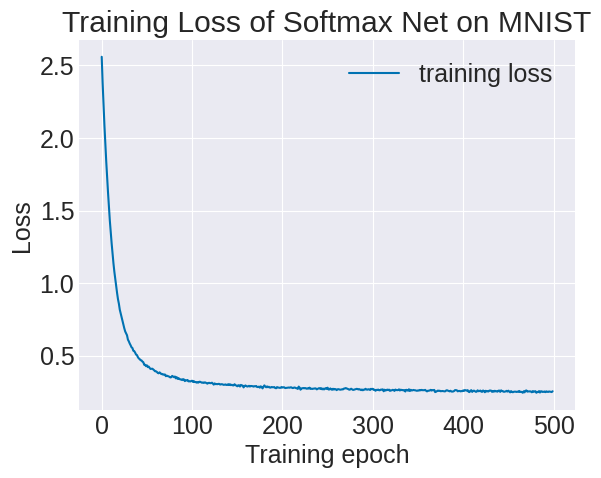

In [34]:
train_loss_hist = hist[0]
val_loss_hist = hist[1]

plt.plot(train_loss_hist, label = "training loss")
plt.xlabel("Training epoch")
plt.ylabel("Loss")
plt.title("Training Loss of Softmax Net on MNIST")
plt.legend();


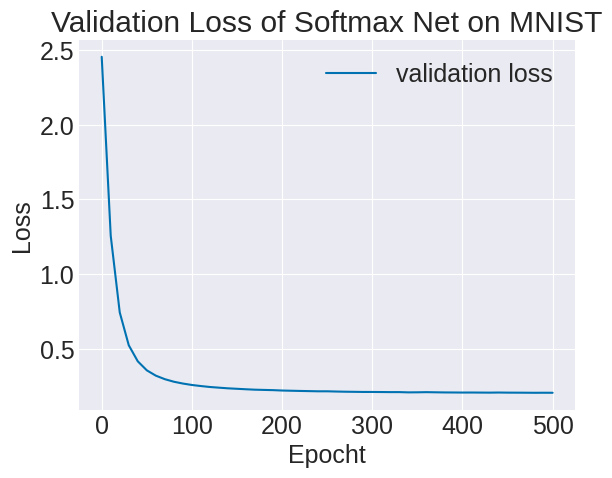

In [37]:
x_val_loss = 10*np.arange(len(val_loss_hist))
plt.plot(x_val_loss,val_loss_hist, label = "validation loss")

plt.xlabel("Epocht")
plt.ylabel("Loss")
plt.title("Validation Loss of Softmax Net on MNIST")
plt.legend();

We see here that the approximate epoch where validation loss and accuracy stops improving is ~370 epochs with default hyperparameters.

In [38]:
#test set:
print("test set accuracy is: "+str(softmaxNet.accuracy(y_test, softmaxNet.predict(x_test))))

test set accuracy is: 0.9265


## Task 4: Training on GPUs

The training workloads in CS443 will be sufficiently computationally demanding that running them on your laptop CPU will not be practical or a good use of your time. While you should develop and debug your project code locally on your computer like last semester, you will want to run your large "production" training jobs on graphics processing units (GPUs). While every computer has a GPU, many are not good for machine learning workflows or do not support training with TensorFlow. A good rule of thumb for what a "large" training run is ~5 minutes or more on your computer.

You have several options for working with GPUs in this class:

**Option 1** (recommended): You run your code on [Paperspace](https://www.paperspace.com). This involves uploading your project folder and all data/python/notebook files to the Paperspace web interface then simply opening the project notebook in the web interface. It costs money (we have a budget kindly offered by DavisAI), so we need to be mindful about usage. In my testing, this is slightly faster than Option 2. If you decide to go this route, your team needs to message me so that I can setup a Paperspace environment for your team.

**Option 2**: You run your code on [Google Colab](https://colab.research.google.com). This involves uploading your project folder and all data/python/notebook files to a folder on Google Drive, opening the notebook from within Google Drive (to open it in Google Colab), selecting that you want to run your code on the GPU from a dropdown menu, and run a code snippet to connect your code with Google Drive. You are able to train on the GPU for free for up to ~12 hours at a time (should be enough time for CS443 work).

**Option 3**: You happen to have a computer with powerful NVIDIA GPU or an Apple Mac with M1 Pro/Max, M2 Pro/Max, M3 Pro/Max chips (*regular M1, M2, and M3 may not be sufficient*). If you follow the instructions on the CS443 website to setup GPU support in TensorFlow, your computers should be able to handle the projects without using a cloud GPU.

Check out the CS443 website for more detailed instructions. Once you decide, move onto the next subtask.

*Note: you can change your mind at any time if an option above is not working well for you!*

### Task 4a. Experiment: Effect of batch size on validation accuracy

In the cell below, run the command from Task 1 that prints out GPU devices that TensorFlow is configured to run compute jobs on. You should see something like:

```
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
```

In [39]:
print('CPU devices:')
print(tf.config.list_physical_devices('CPU'))
print('GPU devices:')
print(tf.config.list_physical_devices('GPU'))

CPU devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU devices:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In the cell below, copy-paste your network training code from Task 3e. Run an experiment where you change the mini-batch size to:
- 2048 (the default)
- 8192
- 50000 (i.e. batch gradient descent)

Use the number of epochs that you settled on from Task 3e that yielded peak validation accuracy. Save/print off:

1. The final validation accuracy.
2. The runtime of `fit` (e.g. by using `time.time()`).

**Note:** Don't forget to re-create/wipe your network clean in between training runs!

In [40]:
#batch_size = default
start = time.time()

softmaxNet = SoftmaxNet(784,10)
hist = softmaxNet.fit(x_train, y_train, x_val, y_val,epochs = 370, val_every = 10)

print(time.time()-start)


epoch: 0
validation accuracy: 0.135
validation loss: 2.5353482
lr: 0.0001

epoch: 10
validation accuracy: 0.682
validation loss: 1.254611
lr: 0.0001

epoch: 20
validation accuracy: 0.827
validation loss: 0.7463871
lr: 0.0001

epoch: 30
validation accuracy: 0.863
validation loss: 0.5289662
lr: 0.0001

epoch: 40
validation accuracy: 0.892
validation loss: 0.42179844
lr: 0.0001

epoch: 50
validation accuracy: 0.906
validation loss: 0.36221975
lr: 0.0001

epoch: 60
validation accuracy: 0.911
validation loss: 0.3262832
lr: 0.0001

epoch: 70
validation accuracy: 0.917
validation loss: 0.30242783
lr: 0.0001

epoch: 80
validation accuracy: 0.919
validation loss: 0.28564346
lr: 0.0001

epoch: 90
validation accuracy: 0.924
validation loss: 0.2733548
lr: 0.0001

epoch: 100
validation accuracy: 0.924
validation loss: 0.2637404
lr: 0.0001

epoch: 110
validation accuracy: 0.925
validation loss: 0.25527632
lr: 0.0001

epoch: 120
validation accuracy: 0.93
validation loss: 0.249283
lr: 0.0001

epoch: 

In [41]:
#Experiment with batch size = 8192
start = time.time()

softmaxNet = SoftmaxNet(784,10)
hist = softmaxNet.fit(x_train, y_train, x_val, y_val,epochs = 370, val_every = 10, batch_size = 8192)

print(time.time()-start)


epoch: 0
validation accuracy: 0.081
validation loss: 2.7869117
lr: 0.0001

epoch: 10
validation accuracy: 0.146
validation loss: 2.3454683
lr: 0.0001

epoch: 20
validation accuracy: 0.267
validation loss: 2.000511
lr: 0.0001

epoch: 30
validation accuracy: 0.412
validation loss: 1.7209225
lr: 0.0001

epoch: 40
validation accuracy: 0.548
validation loss: 1.4905667
lr: 0.0001

epoch: 50
validation accuracy: 0.639
validation loss: 1.298917
lr: 0.0001

epoch: 60
validation accuracy: 0.704
validation loss: 1.1397185
lr: 0.0001

epoch: 70
validation accuracy: 0.745
validation loss: 1.0084696
lr: 0.0001

epoch: 80
validation accuracy: 0.777
validation loss: 0.90039974
lr: 0.0001

epoch: 90
validation accuracy: 0.797
validation loss: 0.8108604
lr: 0.0001

epoch: 100
validation accuracy: 0.812
validation loss: 0.7367009
lr: 0.0001

epoch: 110
validation accuracy: 0.822
validation loss: 0.674631
lr: 0.0001

epoch: 120
validation accuracy: 0.838
validation loss: 0.6220685
lr: 0.0001

epoch: 130


In [42]:
# Now try with batch_size = 50000
start = time.time()

softmaxNet = SoftmaxNet(784,10)
hist = softmaxNet.fit(x_train, y_train, x_val, y_val,epochs = 370, val_every = 10, batch_size = 50000)

print(time.time()-start)


epoch: 0
validation accuracy: 0.049
validation loss: 2.7249813
lr: 0.0001

epoch: 10
validation accuracy: 0.055
validation loss: 2.653633
lr: 0.0001

epoch: 20
validation accuracy: 0.056
validation loss: 2.5856884
lr: 0.0001

epoch: 30
validation accuracy: 0.072
validation loss: 2.5207691
lr: 0.0001

epoch: 40
validation accuracy: 0.084
validation loss: 2.4586012
lr: 0.0001

epoch: 50
validation accuracy: 0.106
validation loss: 2.39891
lr: 0.0001

epoch: 60
validation accuracy: 0.129
validation loss: 2.3414118
lr: 0.0001

epoch: 70
validation accuracy: 0.147
validation loss: 2.2858467
lr: 0.0001

epoch: 80
validation accuracy: 0.175
validation loss: 2.2320526
lr: 0.0001

epoch: 90
validation accuracy: 0.197
validation loss: 2.1799638
lr: 0.0001

epoch: 100
validation accuracy: 0.21
validation loss: 2.1293995
lr: 0.0001

epoch: 110
validation accuracy: 0.228
validation loss: 2.0801187
lr: 0.0001

epoch: 120
validation accuracy: 0.257
validation loss: 2.0321803
lr: 0.0001

epoch: 130
va

### Task 4b. Questions

**Question 1:** For the 3 mini-batch sizes that you tested, how does the final validation accuracy change based on the mini-batch choices? Be specific.

**Question 2:** For the 3 mini-batch sizes that you tested, how does the runtime differ? Be specific and relate your answer to you found in Question 1.

**Question 3:** Why do you think you observed the trend that you did? The result should be fairly striking.  

*It turns out that this result is fairly common in many different training scenarios. Keep this in mind going forward and when you think about selecting mini-batch sizes.*

**Reminder:** You should not use AI in projects, including in your answers to questions.

**Answer 1:**

The final validation accuracy for default parameters was best. As we increase batch size while keeping all else the same, the validation accuracy decreases. 93.7% vs 91.1% vs 72.1% for batch_size = 2048, 8192, and 50000 respectively.

**Answer 2:**

The runtime for larger mini-batches is considerably faster.  This is because there are less weight updates (which are more time consuming than forward passes) during runtime. We would have to run over more epochs to represent the same amount of learning as default parameters.

**Answer 3:**

I think that the value per weight update is central to the observed differences.  With larger mini-batch sizes, we are doing significantly less weight updates, but they are more meaningful since they refelect a greater proportion of our data.  I think for all of these cases 2000+ inputs represents a reasonable subset of our data so more weight updates will achieve better results.






## Extensions

### a. AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. This is a reminder that projects (and extensions) with AI generated content will not be graded. This includes code and written text.

### b. Guidelines

To receive credit for any extension, you must:
1. **You must describe what you did and what you found in detail**.
2. Include (*labeled!*) plots and/or numbers to present your results.
3. Write up your extensions below or in a separate notebook.
4. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### Early Stopping Support:

The idea with early stopping is to stop training when training stops being effective.  A common way to do this is to set some tolerance for improvement in loss or accuracy.  I'm choosing to let the user select the tolerance to the amount in reduction of the validation loss over 3 reporting periods.

Formally, if `val_loss` does not improve for `tolerance` reporting periods (`tolerance` * `val_every` epochs), then training will stop.

Implementing this is pretty simple actually

1. We add our additional parameter `tolerance` with defaults of `None` to our `fit` function

2. Define a `best_so_far` variable which represents the lowest validation loss so far

3. Define a `counter` which represents the number of validation reports that have passed since there has been an improvement in validation loss

3. Add a logic gate which asks if the most recent validation loss is less than `best_so_far`, if it is, then `best_so_far = cur_val_loss` and reset our counter to 0 otherwise, we increment our counter

4. Add a logic gate which asks if `counter >= tolerance`. If true: stop training, else: continue


In [43]:
import time
start = time.time()

softmaxNet = SoftmaxNet(784,10)
hist = softmaxNet.fit(x_train, y_train, x_val, y_val,epochs = 1000, val_every = 10, batch_size = 2048, tolerance = 3, lr = 0.001)

print(time.time()-start)


epoch: 0
validation accuracy: 0.607
validation loss: 1.4033904
lr: 0.001

epoch: 10
validation accuracy: 0.921
validation loss: 0.2570817
lr: 0.001

epoch: 20
validation accuracy: 0.935
validation loss: 0.22352281
lr: 0.001

epoch: 30
validation accuracy: 0.939
validation loss: 0.21406709
lr: 0.001

epoch: 40
validation accuracy: 0.94
validation loss: 0.21332398
lr: 0.001

epoch: 50
validation accuracy: 0.941
validation loss: 0.21144566
lr: 0.001

epoch: 60
validation accuracy: 0.941
validation loss: 0.21181498
lr: 0.001

epoch: 70
validation accuracy: 0.941
validation loss: 0.2083654
lr: 0.001

epoch: 80
validation accuracy: 0.939
validation loss: 0.20909621
lr: 0.001

epoch: 90
validation accuracy: 0.94
validation loss: 0.21020842
lr: 0.001
Early stopping initiated.  Validation loss has not improved for 3 reporting periods
Finished training after 101 epochs!
37.46626853942871


The primary use for early stopping is to save time.  It doens't make sense to train a model when it is not learning meaningfully (reducing loss on validation set).  

### 4. Add learning rate decay support to your training pipeline

Learning rate decay decreases the learning rate over the course of training to more closely hone in on the final global/local minimum that your neural network converges on. A simple, common, and effective method is to decrease the learning rate by some percentage every X epochs. Integrate optional support for this in your `fit` method and demonstrate how it may be helpful.

Before implementing learning rate decay, we need to think about how we want to reduce our learning rate as we go.

Fundementally, we need to think about how this works with regards to our optimizer, adam. Upon some investigation there are several important factors to consider.

Adam is already adapting weight updates and optimizing the learnign rate, so we don't need to do anything overly complicated here.  Adam already does this.  This means it makes much more sense to decrease our learning rate at a relatively high rate.  I've seen 95-99.99% used frequently depending on the number of intended epochs for training. https://stats.stackexchange.com/questions/200063/adam-optimizer-with-exponential-decay

For this reason we will be using exponential decay with a relatively high proportion.  We will also start using a learning rate that is relatively high, 0.005.  (our default is 0.0001)


#### Implementation:

implementation here is also straightforward.  We add a new parameter `decay_rate` and multiply our learning rate by this value over each epoch


In [44]:
import time
start = time.time()

softmaxNet = SoftmaxNet(784,10)
hist = softmaxNet.fit(x_train, y_train, x_val, y_val,epochs = 1000, val_every = 10, batch_size = 8192, tolerance = 3, lr = 0.002, decay_rate = 0.99)

print(time.time()-start)


epoch: 0
validation accuracy: 0.358
validation loss: 1.8612994
lr: 0.00198

epoch: 10
validation accuracy: 0.898
validation loss: 0.38483655
lr: 0.0017906765085174325

epoch: 20
validation accuracy: 0.922
validation loss: 0.269678
lr: 0.0016194557364425167

epoch: 30
validation accuracy: 0.929
validation loss: 0.24087383
lr: 0.0014646067393087945

epoch: 40
validation accuracy: 0.936
validation loss: 0.22557871
lr: 0.0013245640819679666

epoch: 50
validation accuracy: 0.937
validation loss: 0.22044638
lr: 0.0011979120129323219

epoch: 60
validation accuracy: 0.938
validation loss: 0.21881467
lr: 0.001083370151933707

epoch: 70
validation accuracy: 0.944
validation loss: 0.21472998
lr: 0.0009797805460084097

epoch: 80
validation accuracy: 0.942
validation loss: 0.21228763
lr: 0.000886095963252345

epoch: 90
validation accuracy: 0.944
validation loss: 0.21000104
lr: 0.0008013693059030809

epoch: 100
validation accuracy: 0.942
validation loss: 0.2089492
lr: 0.0007247440357209937

epoch: 

We see here that learning rate is slowly decreasing as we move through training. Picking a good decay rate is really hard because one needs to have a good idea as to how many epochs the model will be effectively training for.  Changing other parameters results in the learning rate decay being less helpful and needing to be tuned again.  Such is the pain of hyperparameter tuning.

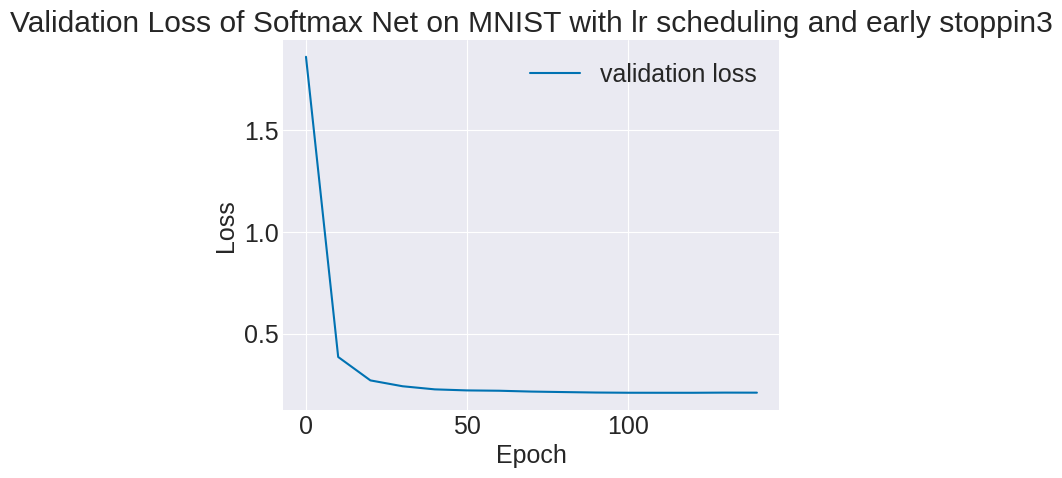

In [45]:
val_loss_hist = hist[1]
x_val_loss = 10*np.arange(len(val_loss_hist))
plt.plot(x_val_loss,val_loss_hist, label = "validation loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Validation Loss of Softmax Net on MNIST with lr scheduling and early stoppin3")
plt.legend();

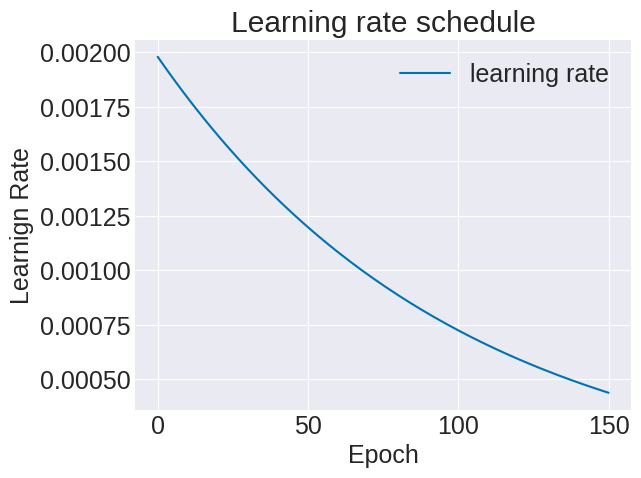

In [46]:
lr_hist = hist[3]
plt.plot(lr_hist, label = "learning rate")

plt.xlabel("Epoch")
plt.ylabel("Learnign Rate")
plt.title("Learning rate schedule")
plt.legend();

Here's a really good example of what we want our learning rate to look like as we train.  We can see that we through a pretty large range of learning rate as we continue to train, spanning from 0.002 to 0.0005 is highly interesting and I imaging coupling this with adam makes the effective learning rate even more specific as we get closer and closer to a local minima in the loss surface.

# exploration of tf.funtion

while looking at the tensor flow documentation I ran across tf.function operation which caught my eye. The big picture of this operation is it allows you to switch from eager execution to graph execution. Eager excution is where all operations are executed by python and results are returned to python whereas graph execution the computations are executed as a TensorFlow graph. This offers portability to devices that lack the python interpreter and tends to offer better performance overall. The graphs are constructed using a set of tf.Operation objects, which represent units of computation; and tf.Tensor objects, which represent the units of data that flow between operations. Since these graphs are data structures, they can be saved, run in parallel, and run efficiently on multiple devices all without the original Python code. below is a visualization of a saved graph taken from the tenserflow documenation webpage

![Screen Shot 2024-02-15 at 7.48.39 PM.png](<attachment:Screen Shot 2024-02-15 at 7.48.39 PM.png>)

With that in mind I briefly explored this operation and expermiented with it to oberseve some of its advantages as well as disadvantages.

In [47]:
# can be called or used as a decorator

# simple def
def simple_add(x,y):
    return tf.add(x, y)


# random constants
x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

# called
tf_simple_add = tf.function(simple_add)

# decorator
@tf.function
def simple_add2(x,y):
    return tf.add(x, y)

# results
print(tf_simple_add(x1,y1))
print(simple_add2(x1, y1))


tf.Tensor(
[[3. 4.]
 [4. 5.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[3. 4.]
 [4. 5.]], shape=(2, 2), dtype=float32)


In [48]:
# observe the stored graph for the autograph and actual graph of function itself
print(tf.autograph.to_code(simple_add))
print(tf_simple_add.get_concrete_function(tf.constant(1), tf.constant(2)).graph.as_graph_def())

def tf__simple_add(x, y):
    with ag__.FunctionScope('simple_add', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = ag__.converted_call(ag__.ld(tf).add, (ag__.ld(x), ag__.ld(y)), None, fscope)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

node {
  name: "x"
  op: "Placeholder"
  attr {
    key: "_user_specified_name"
    value {
      s: "x"
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
}
node {
  name: "y"
  op: "Placeholder"
  attr {
    key: "_user_specified_name"
    value {
      s: "y"
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "shape"
    v

Next I looked at how tracing works which is what causes the speedup but can run someone into issues if not careful. In the example below we see that even tho we run the function 3 times the print statement only occurs once and this is due to tracing: the print statement is executed when tf.function runs the original code in order to create the graph which captures the tensorflow operations into a graph, and print is not captured in the graph. The graph is then executed for all three calls without ever running the Python code again. In-order to excute it eageraly and get the 3 print statements we need to set run eagerly to True globally as seen below.

In [49]:
@tf.function
def get_sum(x, y):
  print("I should print 3 times!")
  sum = x + y
  return tf.reduce_sum(sum)

In [50]:
#only prints once!
get_sum(5,5)
get_sum(5,5)
get_sum(5,5)

I should print 3 times!


<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [51]:
# prints 3 times

# set eagerly run to true
tf.config.run_functions_eagerly(True)
get_sum(5,5)
get_sum(5,5)
get_sum(5,5)

I should print 3 times!
I should print 3 times!
I should print 3 times!


<tf.Tensor: shape=(), dtype=int32, numpy=10>

lastly, I briefly demonstrated the speedup provided by graphs compared without them. I created a random tensor and did i simple matrix operation on it in a loop. Looking at the results we see that it does provide a major speedup after a certain threshold that overtakes the overhead created from making the graph. So for small task it could potenitally take longer to execute than it would take if done eagearly.

In [52]:
x = tf.random.uniform(shape=[50, 50], minval=-1, maxval=2, dtype=tf.dtypes.int32)

def power(x, y):
  I = tf.eye(50, dtype=tf.dtypes.int32)
  for _ in range(y):
    I = tf.matmul(x, I)
  return I

In [53]:
import timeit
print("Eager execution:", timeit.timeit(lambda: power(x, 500), number=1000), "seconds")

Eager execution: 35.41842309200001 seconds


In [54]:
power_as_graph = tf.function(power)
print("Graph execution:", timeit.timeit(lambda: power_as_graph(x, 100), number=1000), "seconds")

Graph execution: 6.461630835999927 seconds


To conclude tf.function allows to build a graph of our code in-order to make it easier to optimize and portable to devices that lack python interpreter however we have to be careful about tracing and python side-effects. In the future I would like to start to incorprate this into my work as it will be more deployable and more efficient such as the case for TinyML.

# Explore other dataset

In [55]:
import mnist

# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [56]:
# class labels for first 10 samples
print(y_train[0:10])

[9 0 0 3 0 2 7 2 5 5]


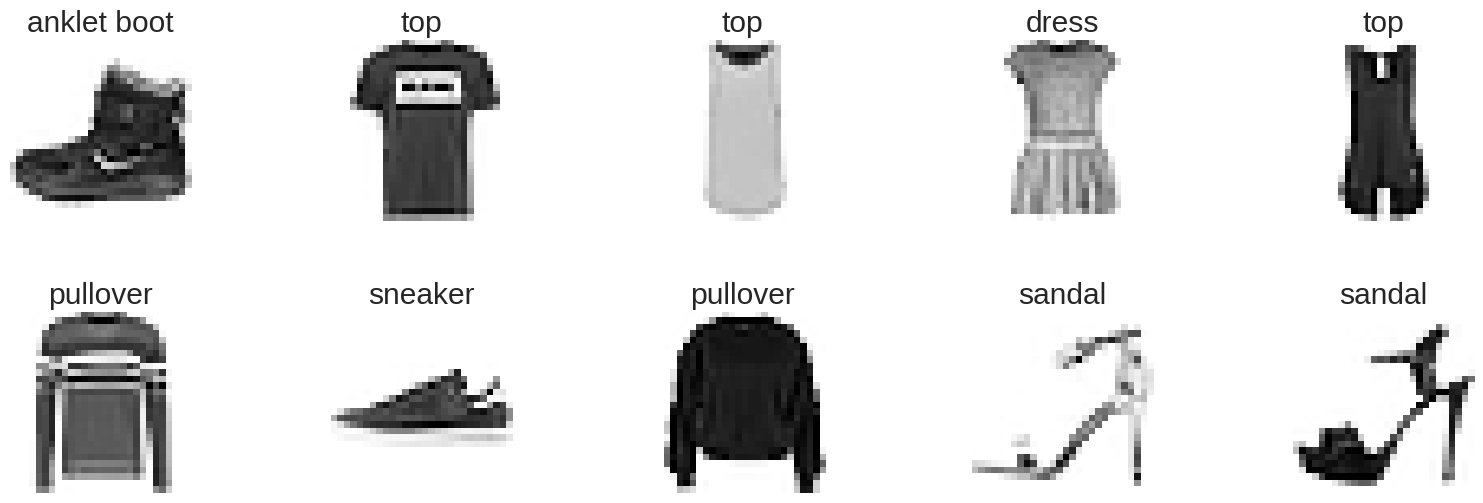

In [57]:
# plot 10 samples
tit = ["anklet boot", "top", "top", "dress", "top", "pullover", "sneaker", "pullover", "sandal", "sandal"]
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
for n in range(10):
  plt.subplot(6,5,n+1)
  plt.imshow(x_train[n])
  plt.title(tit[n])
  plt.axis('off')
plt.show()

In [58]:
# preprocess data
x_t,y_t,x_v, y_v = mnist.train_val_split(x_train, y_train, 1000)

x_train_f = tf.constant(mnist.preprocess_mnist(x_t),tf.float32)
y_train_f = tf.constant(y_t, tf.int64)
x_val_f = tf.constant(mnist.preprocess_mnist(x_v), tf.float32)
x_test_f = tf.constant(mnist.preprocess_mnist(x_test), tf.float32)
y_val_f = tf.constant(y_v, tf.int64)
y_test_f = tf.constant(y_test, tf.int64)



# test to make sure data preprocess went well
print(x_train_f.shape, x_val_f.shape, x_test_f.shape,)
print(x_train_f.dtype, x_val_f.dtype, x_test_f.dtype, y_val_f.dtype, )
print(f'Train min/max: {tf.reduce_min(x_train_f)}/{tf.reduce_max(x_train_f)}')
print(f'Validation min/max: {tf.reduce_min(x_val_f)}/{tf.reduce_max(x_val_f)}')
print(f'Test min/max: {tf.reduce_min(x_test_f)}/{tf.reduce_max(x_test_f)}')

(59000, 784) (1000, 784) (10000, 784)
<dtype: 'float32'> <dtype: 'float32'> <dtype: 'float32'> <dtype: 'int64'>
Train min/max: 0.0/1.0
Validation min/max: 0.0/1.0
Test min/max: 0.0/1.0


In [60]:
softmaxNet = SoftmaxNet(784,10)
hist = softmaxNet.fit(x_train_f, y_train_f, x_val_f, y_val_f,epochs = 120, val_every = 10)


epoch: 0
validation accuracy: 0.245
validation loss: 2.3551493
lr: 0.0001

epoch: 10
validation accuracy: 0.687
validation loss: 0.94217396
lr: 0.0001

epoch: 20
validation accuracy: 0.764
validation loss: 0.71764076
lr: 0.0001

epoch: 30
validation accuracy: 0.793
validation loss: 0.6279202
lr: 0.0001

epoch: 40
validation accuracy: 0.813
validation loss: 0.57593256
lr: 0.0001

epoch: 50
validation accuracy: 0.824
validation loss: 0.5438739
lr: 0.0001

epoch: 60
validation accuracy: 0.831
validation loss: 0.5187641
lr: 0.0001

epoch: 70
validation accuracy: 0.835
validation loss: 0.5019211
lr: 0.0001

epoch: 80
validation accuracy: 0.838
validation loss: 0.48905316
lr: 0.0001

epoch: 90
validation accuracy: 0.842
validation loss: 0.47701824
lr: 0.0001

epoch: 100
validation accuracy: 0.838
validation loss: 0.46924716
lr: 0.0001

epoch: 110
validation accuracy: 0.843
validation loss: 0.4627292
lr: 0.0001

epoch: 119
validation accuracy: 0.848
validation loss: 0.45589623
lr: 0.0001
Fin

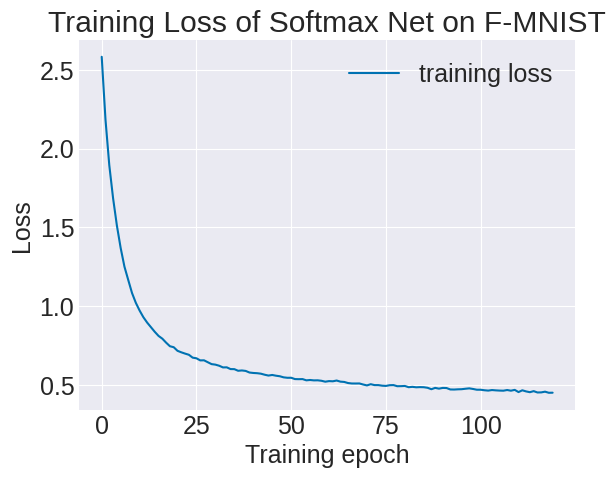

In [61]:
train_loss_hist = hist[0]
val_loss_hist = hist[1]

plt.plot(train_loss_hist, label = "training loss")
plt.xlabel("Training epoch")
plt.ylabel("Loss")
plt.title("Training Loss of Softmax Net on F-MNIST")
plt.legend()

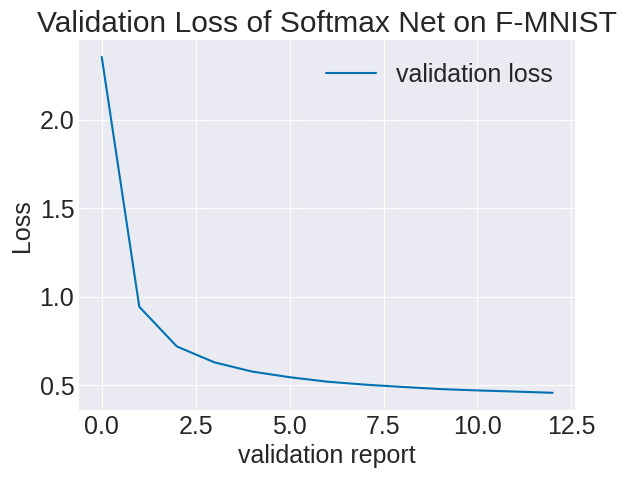

In [62]:
plt.plot(val_loss_hist, label = "validation loss")
plt.xlabel("validation report")
plt.ylabel("Loss")
plt.title("Validation Loss of Softmax Net on F-MNIST")
plt.legend()

In [63]:
print("test set accuracy is: "+str(softmaxNet.accuracy(y_test_f, softmaxNet.predict(x_test_f))))

test set accuracy is: 0.8332


In [64]:
# confusing matrix from CS251
def confusion_matrix(y, y_pred):
        un_arr = np.unique(y)
        r = un_arr.shape[0]


        y_pred = np.array(y_pred, dtype=int)
        y = np.array(y, dtype=int)
        m = [[0] * r for i in range(r)]
        for pred, exp in zip(y_pred, y):
            m[pred][exp] += 1
        return m

In [65]:

y_pred = softmaxNet.predict(x_test_f)
confusion = confusion_matrix(y_test_f, y_pred)

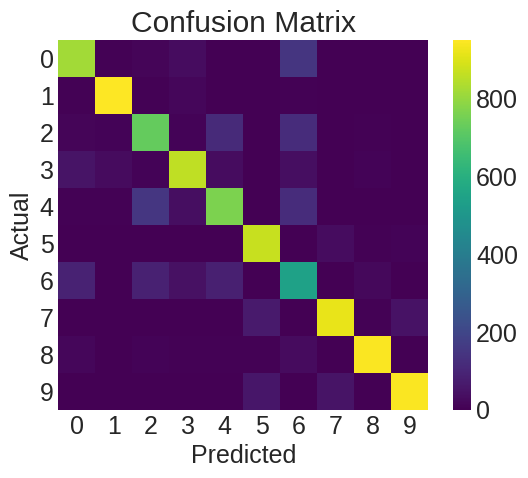

In [66]:
class_names = [str(i) for i in range(0, 10)]

#plot
plt.imshow(confusion, interpolation='nearest', cmap= 'viridis')
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.grid([])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [67]:
print(np.array(confusion))

[[819   5  13  33   0   1 146   0   3   0]
 [  4 949   5  16   2   1   4   0   1   0]
 [ 14  10 725   9 112   0 120   0   6   0]
 [ 49  28  11 858  33   0  35   0  10   0]
 [  7   4 150  37 763   0 122   0   2   0]
 [  0   0   1   1   0 868   0  33   6  10]
 [ 92   2  86  42  83   0 544   0  21   0]
 [  0   0   0   0   0  67   0 918   6  46]
 [ 15   2   9   4   7   4  29   0 945   1]
 [  0   0   0   0   0  59   0  49   0 943]]


Looking at the matrix we see that T-shirt/top (0) is most likely to be mistaken for shirt (6), Trouser (1) is predicted very well, Pullover (2) is most likely mistaken for shirt (6) or coat (4), dress (3) is predicted pretty well, coat is most likely mistaken pullover or shirt, sandle (5) is predicted very well, shirt is mistaken for pullover T-shirt/top, sneaker (7) is predicted very well, bag (8) is predicted very well, and lastly ankle boot (9) is predicted very well. These results are expected since a shirt and a pullover and a t-shirt look very similar and are sometimes confused for eachother.